# Purpose Code DL NN

## Importing relavent packages

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec as w2v
from sklearn.feature_extraction import text
import string
import sys

%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

## Reading in data

In [2]:
df = pd.read_csv("labeled2000.csv")
df.head()

,Purpose Code,Final Estimate
0,MEDIA BUY,media
1,MEDIA,media
2,MEDIA PLACEMENT,media
3,TV / MEDIA PLACEMENT,media
4,TELEVISION ADVERTISING,media


## Cleaning Purposecodes

In [14]:
print("cleaning purposecodes")
purposeCodes = df["Purpose Code"].values
labels = df["Final Estimate"].values
# lowercase
purposeCodes = np.array([x.lower() for x in purposeCodes])
# remove punctuation
purposeCodes = np.array([x.translate(str.maketrans('', '', string.punctuation)) for x in purposeCodes])
# remove digits
purposeCodes = np.array([x.translate(str.maketrans('', '', string.digits)) for x in purposeCodes])
count = 0
print("purposecodes cleaned")
print(purposeCodes)

cleaning purposecodes
purposecodes cleaned
['media buy' 'media' 'media placement' 'tv  media placement'
 'television advertising' 'tvmedia placement' 'tv ad buy estimate'
 'media placementproduction' 'media buy tv'
 'media buy also supports mitt romney' 'media tv advertising buy'
 'digital media marketing revenue sharing' 'tv advertising' 'direct mail'
 'media placement  broadcastcable' 'online advertising'
 'media buy  estimate' 'tv ad air buy production costs' 'tv ad buy'
 'media production' 'tvmedia placement  radio placement'
 'digital ad buy estimate' 'canvassing services' 'tv advertising buy'
 'advertising  tv' 'tv advertising  media buys' 'media time buy'
 'radio advertising' 'digital advertising' 'television ad buy'
 'advertisingtv placement new ideas' 'direct mail services'
 'advertisingtv placement tick tock'
 'media placement  broadcastcablesatellite' 'direct mail costs' 'tv buy'
 'television ads' 'advertising' 'direct mail  estimate' 'web ads'
 'labor and postage for mailpi

In [4]:
#featurevectorizer = text.TfidfVectorizer(binary=True).fit(purposeCodes)
'''featurevectorizer = text.CountVectorizer(ngram_range=(1,2)).fit(purposeCodes)
X = featurevectorizer.transform(purposeCodes)
labelvectorizer = text.CountVectorizer(binary=True).fit(labels)
y = labelvectorizer.transform(labels)
X = X.todense()
y = y.todense()
print("Features shape: ")
print(X.shape)
print("Labels shape: ")
print(y.shape)'''

'featurevectorizer = text.CountVectorizer(ngram_range=(1,2)).fit(purposeCodes)\nX = featurevectorizer.transform(purposeCodes)\nlabelvectorizer = text.CountVectorizer(binary=True).fit(labels)\ny = labelvectorizer.transform(labels)\nX = X.todense()\ny = y.todense()\nprint("Features shape: ")\nprint(X.shape)\nprint("Labels shape: ")\nprint(y.shape)'

In [4]:
featurevectorizer = text.CountVectorizer(binary=True).fit(purposeCodes)
X = featurevectorizer.transform(purposeCodes)
labelvectorizer = text.CountVectorizer(binary=True).fit(labels)
y = labelvectorizer.transform(labels)
X = X.todense()
y = y.todense()
print("Features shape: ")
print(X.shape)
print("Labels shape: ")
print(y.shape)

Features shape: 
(1999, 1299)
Labels shape: 
(1999, 10)


In [16]:
print(featurevectorizer.get_feature_names())

['about', 'account', 'activities', 'activity', 'actual', 'ad', 'add', 'addition', 'additional', 'adds', 'administration', 'adproduction', 'ads', 'adscommunications', 'adsdistribution', 'adsestimated', 'adsproduction', 'adveritsing', 'advert', 'advertigins', 'advertiising', 'advertisement', 'advertisements', 'advertisementwill', 'advertising', 'advertisingalso', 'advertisingestimated', 'advertisingplacement', 'advertisingproduction', 'advertisingtv', 'advertisment', 'advetising', 'advocacy', 'advocacytinternet', 'adwords', 'aerial', 'affair', 'afford', 'afscmem', 'again', 'against', 'agency', 'agenda', 'aimee', 'air', 'airs', 'airtime', 'aitime', 'al', 'alaska', 'alex', 'allies', 'also', 'america', 'american', 'amerish', 'amount', 'an', 'analytics', 'and', 'andrew', 'andy', 'angle', 'ann', 'anos', 'anywhere', 'ap', 'approach', 'april', 'around', 'as', 'assest', 'august', 'automated', 'away', 'ayotte', 'baca', 'back', 'backing', 'bad', 'balanced', 'bank', 'banking', 'banks', 'banner', 'b

# Defining Helper Class to generate Batch Sizes

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train shape " + str(X_train.shape))
print("y_train shape " + str(y_train.shape))
print("X_test shape " + str(X_test.shape))
print("y_test shape " + str(y_test.shape))

X_train shape (1399, 1299)
y_train shape (1399, 10)
X_test shape (600, 1299)
y_test shape (600, 10)


In [19]:
class BatchHelper():
    
    def __init__(self):
        self.i = 0

        self.training_phrases = None
        self.training_labels = None
        
        self.testing_phrases = None
        self.training_labels = None
    
    def set_up_images(self):
        print ("Setting Up Training Images and Labels")
        self.training_phrases = X_train
        self.training_labels = y_train
        
        self.testing_phrases = X_test
        self.testing_labels = y_test
        
    def next_batch(self, batch_size):
        x = self.training_phrases[self.i: self.i + batch_size]
        y = self.training_labels[self.i: self.i + batch_size]
        self.i = (self.i + batch_size) % self.training_phrases.shape[0]
        return x, y
        

In [20]:
bh = BatchHelper()
bh.set_up_images()

Setting Up Training Images and Labels


In [21]:
batch_features, batch_labels = bh.next_batch(100)
print(batch_features.shape)
print(type(batch_features))
print(batch_labels.shape)
print(type(batch_labels))
print(bh.i)


(100, 1299)
<class 'numpy.matrix'>
(100, 10)
<class 'numpy.matrix'>
100


# Creating the model

### Input data and labels

In [22]:
x = tf.placeholder(tf.float32, shape = [None, 1299]) #3856
y_true = tf.placeholder(tf.float32, shape = [None, 10])

### Hold Probability (For Dropout Layer)

In [23]:
hold_prob = tf.placeholder(tf.float32)

# Helper Functions

### Functions that create and perform operations of CNN

In [24]:
# initializing an array of weights
def init_weights(shape):
    W = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(W)

In [25]:
# initializing an array of biases
def init_bias(shape):
    b = tf.constant(0.1, shape = shape)
    return tf.Variable(b)

In [26]:
# creating a regular DNN layer
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

### Creating the Layers

In [27]:
full_layer_1 = normal_full_layer(x, 256)
full_layer_2 = normal_full_layer(full_layer_1, 256)
#full_layer_3 = normal_full_layer(full_layer_2, 512)
#full_layer_4 = normal_full_layer(full_layer_3, 512)

### Creating the dropout layer

In [28]:
full_one_dropout = tf.nn.dropout(full_layer_2, keep_prob = hold_prob)

### The final full layer to get predictions

In [29]:
y_pred = normal_full_layer(full_layer_2, 10)
#y_pred = normal_full_layer(full_one_dropout, 10)

# Defining Loss Functions

In [30]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### Making the Optimizer

In [31]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.00005)
train = optimizer.minimize(cross_entropy)

### Creating Global Variables Initializer

In [32]:
init = tf.global_variables_initializer()

# Running the Session

In [33]:
steps = 10000
accuracy = []

with tf.Session() as sess:
    
    sess.run(init)
    
    bh = BatchHelper()
    bh.set_up_images()
    
    for i in range (steps):
        batch_x, batch_y = bh.next_batch(50)
        sess.run (train, feed_dict = {x: batch_x, y_true: batch_y, hold_prob: 1})
        
        if ((i%20 == 0)):
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            
            temp = sess.run(acc,feed_dict={x: X_test, y_true: y_test ,hold_prob:1.0})
            accuracy.append(temp)
            print(temp)
            print('\n')
            

Setting Up Training Images and Labels
Currently on step 0
Accuracy is:
0.19666667


Currently on step 20
Accuracy is:
0.46666667


Currently on step 40
Accuracy is:
0.55


Currently on step 60
Accuracy is:
0.57666665


Currently on step 80
Accuracy is:
0.5883333


Currently on step 100
Accuracy is:
0.59166664


Currently on step 120
Accuracy is:
0.61833334


Currently on step 140
Accuracy is:
0.6383333


Currently on step 160
Accuracy is:
0.6566667


Currently on step 180
Accuracy is:
0.66333336


Currently on step 200
Accuracy is:
0.68333334


Currently on step 220
Accuracy is:
0.6983333


Currently on step 240
Accuracy is:
0.70666665


Currently on step 260
Accuracy is:
0.7183333


Currently on step 280
Accuracy is:
0.73


Currently on step 300
Accuracy is:
0.745


Currently on step 320
Accuracy is:
0.7583333


Currently on step 340
Accuracy is:
0.765


Currently on step 360
Accuracy is:
0.775


Currently on step 380
Accuracy is:
0.785


Currently on step 400
Accuracy is:
0.7966667



KeyboardInterrupt: 

Final accuracy:  0.89


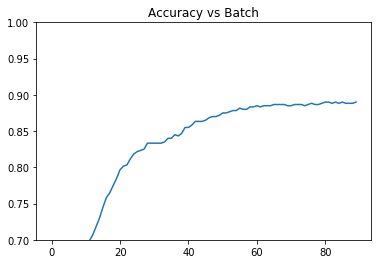

In [34]:
plt.plot(accuracy)
plt.title("Accuracy vs Batch")
plt.ylim(0.7, 1)
print("Final accuracy: ", accuracy[-1])